In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [69]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [70]:
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

In [71]:
df = pd.get_dummies(df, columns=['Fuel_Type']).astype(int)

In [72]:
print(df.isnull().sum())

Price               0
Age                 0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [73]:
df

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [74]:
df.Cylinders.value_counts(),df.Doors.value_counts(),

(Cylinders
 4    1436
 Name: count, dtype: int64,
 Doors
 5    674
 3    622
 4    138
 2      2
 Name: count, dtype: int64)

In [75]:
df = df.drop(['Cylinders', 'Doors'], axis=1)

In [76]:
df

,Price,Age,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,5,1165,0,1,0
1,13750,23,72937,90,0,2000,5,1165,0,1,0
2,13950,24,41711,90,0,2000,5,1165,0,1,0
3,14950,26,48000,90,0,2000,5,1165,0,1,0
4,13750,30,38500,90,0,2000,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,5,1015,0,0,1


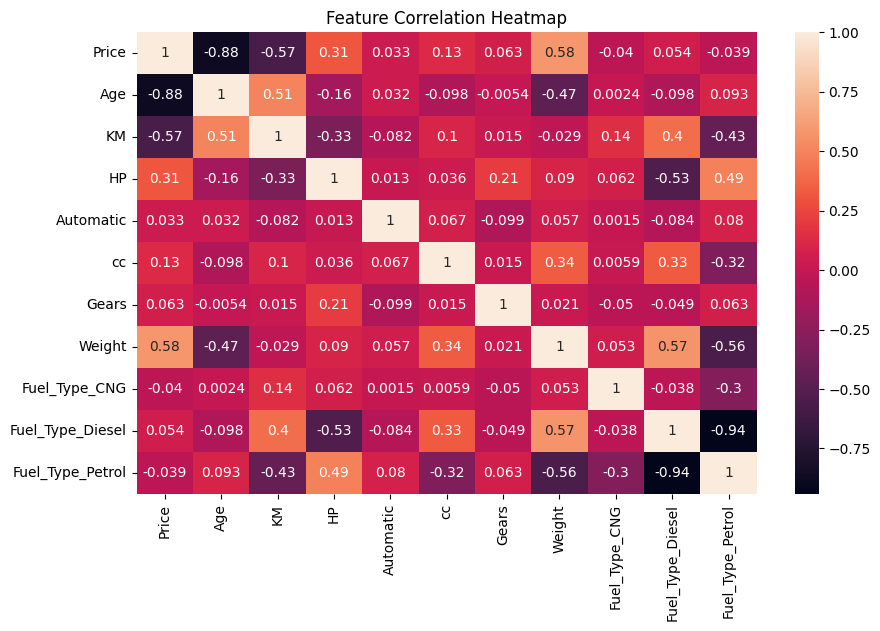

In [77]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

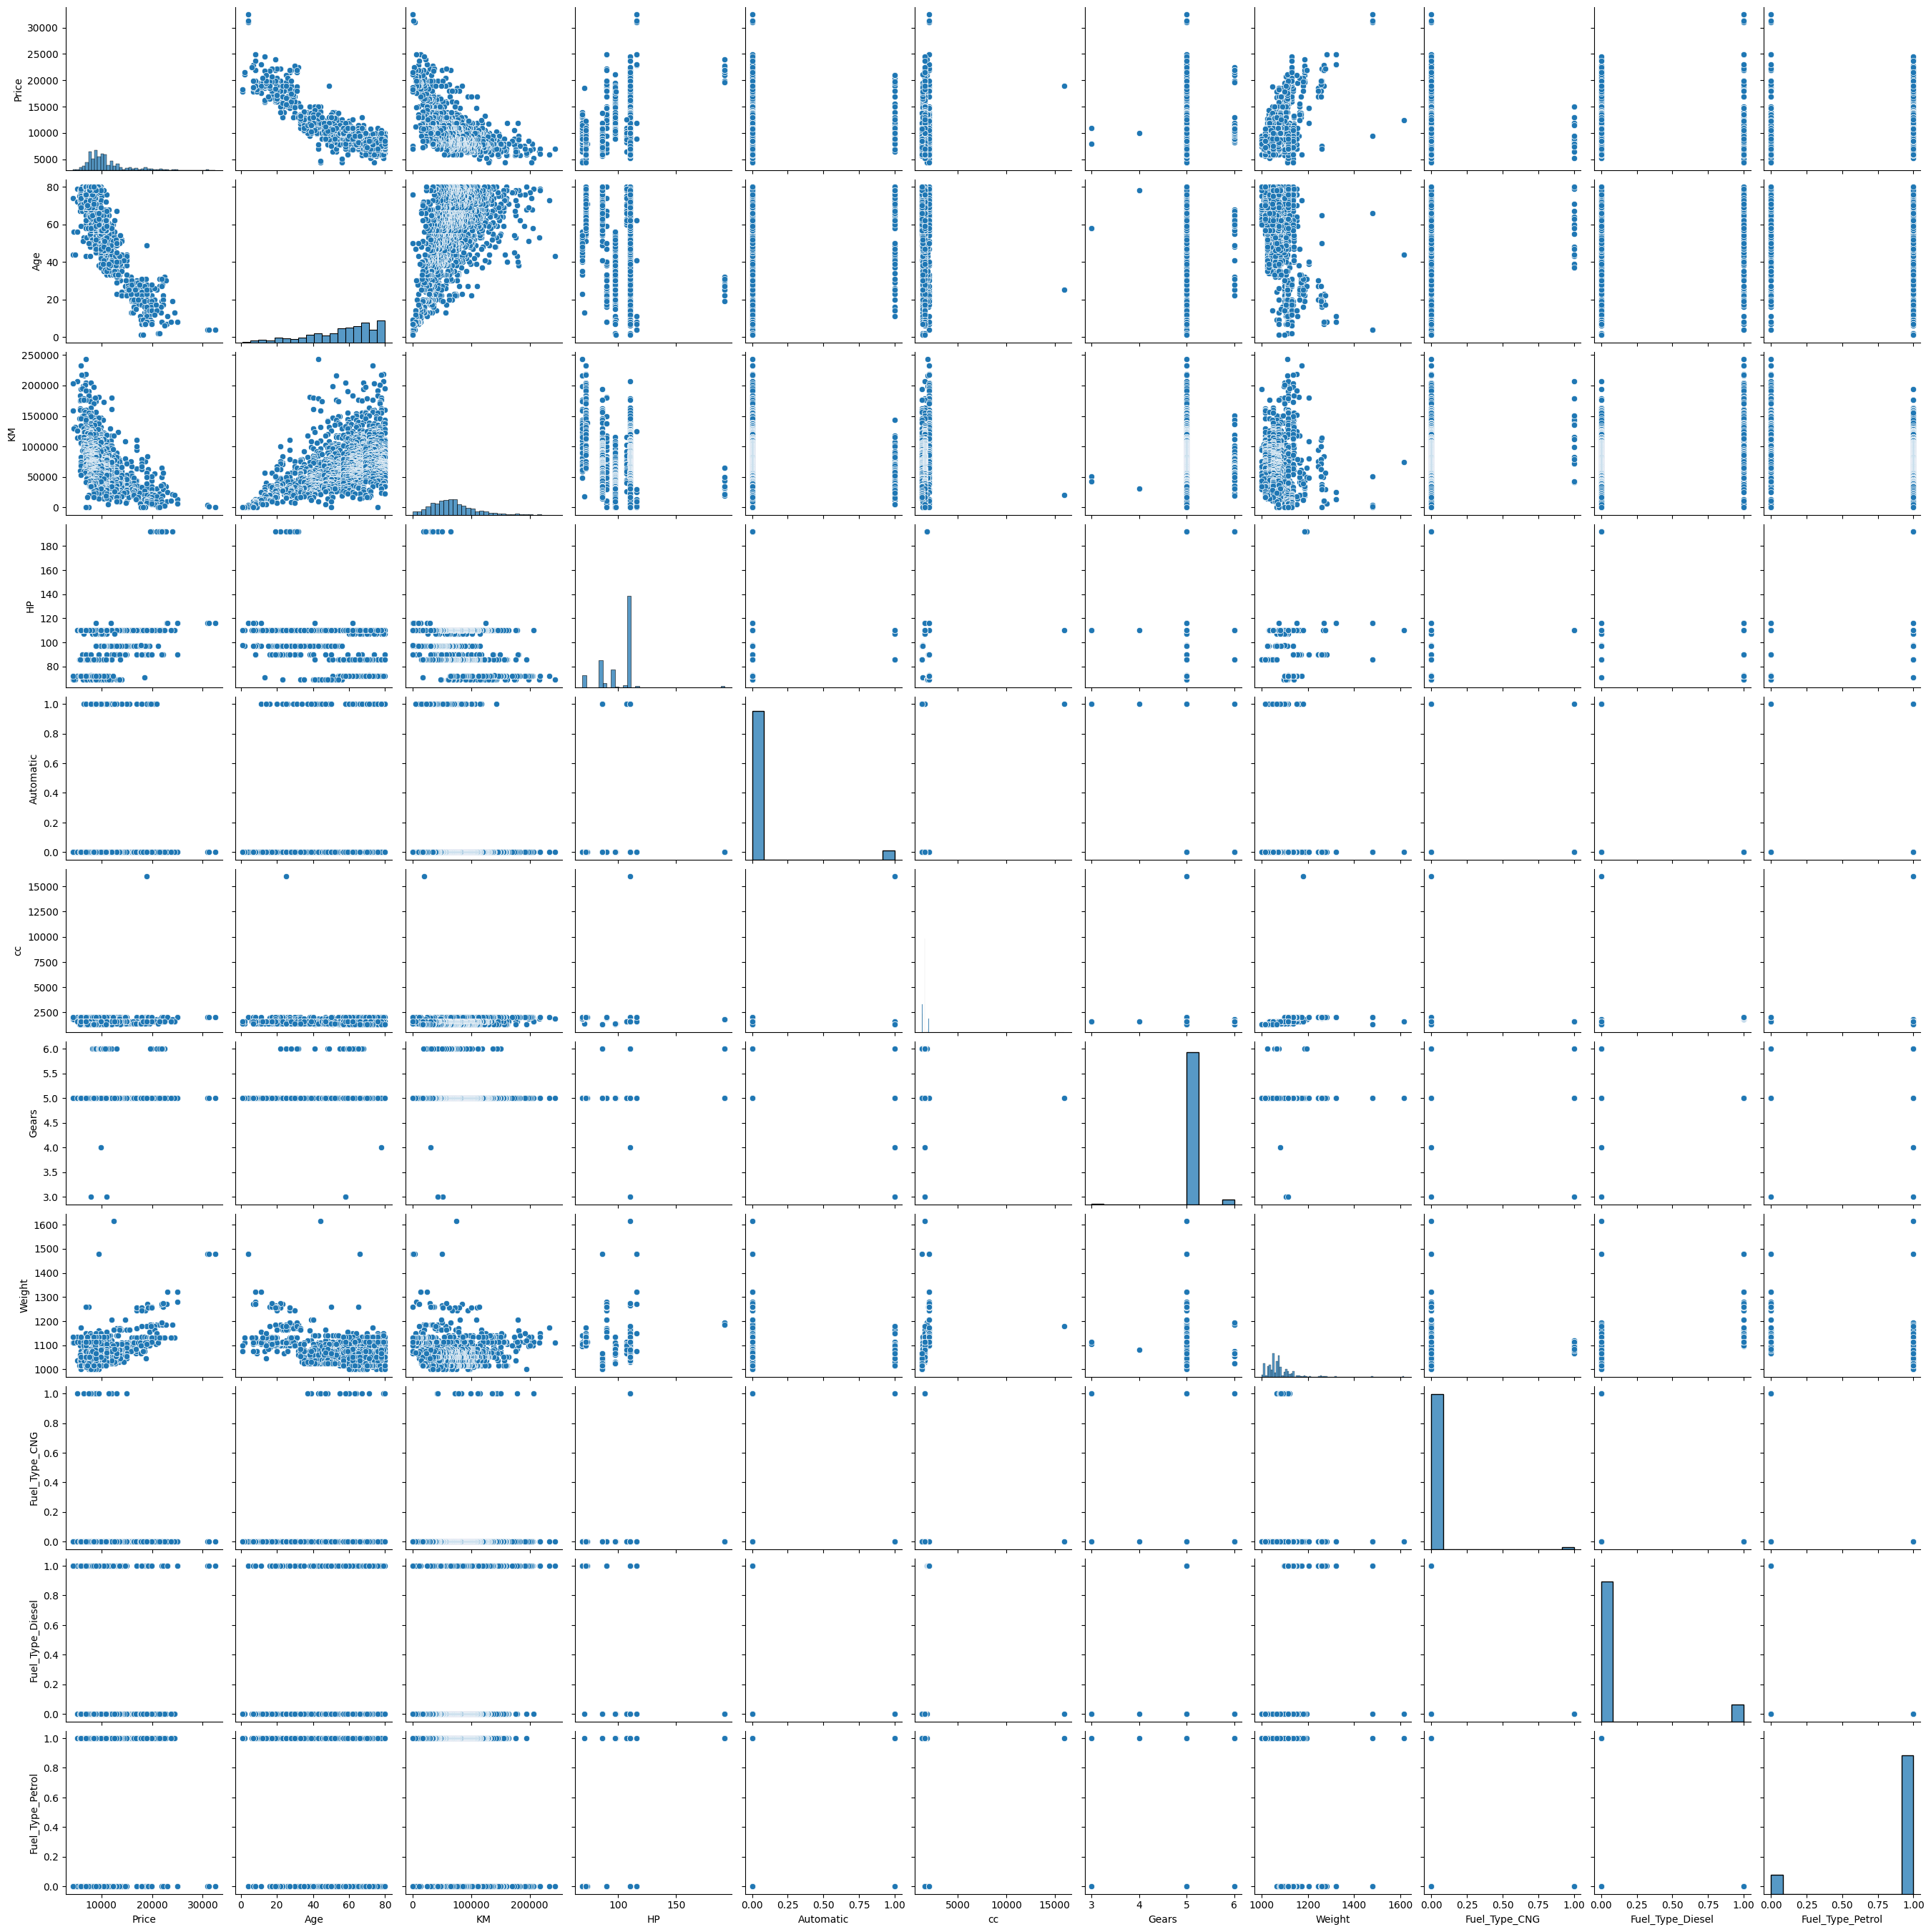

In [78]:
sns.pairplot(df)

In [79]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750
...,...
174,21950
1428,8450
297,12850
1435,6950


**Model-1**

In [118]:
model1= smf.ols('y~x',data =df).fit()

In [85]:
model1.pvalues
#There is not have multi-colinearity Problem

,0
Intercept,1.699042e-09
x[0],1.723580e-292
x[1],5.594770e-38
x[2],4.003870e-11
x[3],5.020434e-02
x[4],5.291299e-01
x[5],8.183344e-04
x[6],7.636903e-65
x[7],4.321476e-11
x[8],1.416129e-06


In [86]:
model1.rsquared

np.float64(0.8648561739001233)

In [119]:
model1.params
#Intercept and Coeficients

,0
Intercept,-6921.279567
x[0],-123.788552
x[1],-0.017609
x[2],23.724000
x[3],313.576395
x[4],-0.057908
x[5],651.354347
x[6],20.509987
x[7],-2876.481738
x[8],-2297.773391


In [121]:
model1.rsquared


np.float64(0.8648561739001233)

**Model-2**

In [123]:
model2 = smf.ols('Price~Age+KM+Weight',data =df).fit()

In [124]:
model2.pvalues

,0
Intercept,5.099603e-02
Age,6.162098e-267
KM,1.221576e-79
Weight,6.992783e-103


In [126]:
model2.params
#Intercept and Coeficients

,0
Intercept,-1880.335564
Age,-120.221174
KM,-0.024183
Weight,19.576043


In [127]:
model2.rsquared

np.float64(0.848104243893788)

**Model-3**

In [133]:
model3 = smf.ols('Price~Age+KM+HP+Weight',data =df).fit()

In [134]:
model3.pvalues

,0
Intercept,1.915580e-05
Age,9.862892e-290
KM,9.483418e-55
HP,3.433587e-31
Weight,1.766938e-100


In [135]:
model3.rsquared

np.float64(0.8617758687562084)

In [137]:
model3.params
#Intercept and Coeficients

,0
Intercept,-4014.641772
Age,-122.424469
KM,-0.019647
HP,30.211927
Weight,18.531868


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [138]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)


Ridge()

In [139]:
y_pred_ridge = ridge_model.predict(x_test)

In [140]:
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")

R2 Score: 0.8363812691249664


In [141]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

In [142]:
y_pred_lasso = lasso_model.predict(x_test)

In [143]:
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")

R2 Score: 0.8364488320672336


**Q1. What is Normalization & Standardization and how is it helpful?**

**1. Normalization (Min-Max Scaling)**
* **Definition:**
Normalization scales the data between a fixed range, usually 0 and 1 (or sometimes -1 to 1). It is useful when you want all features to have the same influence on the model.

**When to Use Normalization?**
* When features have different ranges and you want to scale them proportionally.
* When using algorithms like KNN, Neural Networks, or Gradient Descent-based models, where the range of values affects performance.

**2. Standardization (Z-Score Scaling)**
* **Definition:** Standardization transforms data so that it has zero mean (μ = 0) and unit variance (σ² = 1). It helps models that assume normally distributed data.
* **When to Use Standardization?**
  * When data follows a normal (Gaussian) distribution.
  * For models like Logistic Regression, SVM, Linear Regression, PCA, where normality improves performance.

**Q2. What techniques can be used to address multicollinearity in multiple linear regression?**
* Variance Inflation Factor (VIF) Analysis
  * Calculate VIF for each variable (VIF > 5 or 10 indicates high multicollinearity).
  * Remove or modify variables with high VIF values.

* Removing Highly Correlated Variables

  * eck the correlation matrix to identify variables with strong relationships.

  * Drop one of the highly correlated variables to reduce redundancy.

* Principal Component Analysis (PCA)

  * Converts correlated variables into a smaller set of uncorrelated principal components.

  * Helps retain most of the information while reducing multicollinearity.

* Ridge Regression (L2 Regularization)

  * Adds a penalty to large coefficients, reducing their impact.

  * Useful when keeping all variables is necessary.

* Lasso Regression (L1 Regularization)

  * Shrinks some coefficients to zero, effectively selecting important variables.

  * Helps in automatic feature selection.